In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

def classify(X, w):
    return np.round(predict(X, w))

def loss(X, Y, w):
    y_hat = predict(X, w)
    first_term = Y * np.log(y_hat)
    second_term = (1 - Y) * np.log(1 - y_hat)
    return -np.average(first_term + second_term)

def gradient(X, Y, w):
    return np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        w -= gradient(X, Y, w) * lr
    return w

In [3]:
df = pd.read_csv("../Data/police.csv", usecols=['Reservations','Police']).values
X_ = df[:,0]
X_ = np.column_stack((np.ones(X_.size), X_))
Y_ = df[:,1].reshape(-1, 1)
w = train(X_, Y_, iterations=1000000, lr=0.01)

In [4]:
print(w)

[[-5.69765021]
 [ 0.47218261]]


In [5]:
def plot_prep():
    plt.plot(X_, Y_, "bo")
    plt.axhline(y=0.5, color='lightgrey', linestyle='-')
    plt.xlabel("Reservations", fontsize=14)
    plt.ylabel("Police Call", fontsize=14)

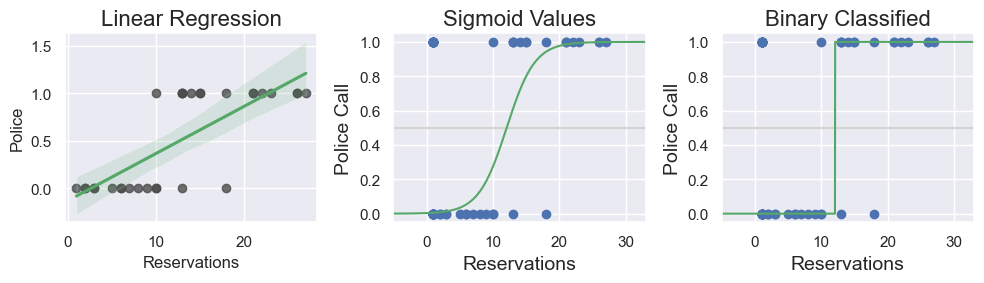

In [6]:
plt.figure(figsize=(10,3))

# Linear regression
df = pd.read_csv("../Data/police.csv", usecols=['Reservations','Police'])
plt.subplot(1,3,1)
sns.regplot(
    data=df, x="Reservations", y="Police",
    ci=99,  color=".3", line_kws=dict(color="g"),
);
plt.title("Linear Regression", fontsize=16);

MARGIN = 3
left_edge = X_[:, 1].min() - MARGIN
right_edge = X_[:, 1].max() + MARGIN
inputs = np.linspace(left_edge - MARGIN, right_edge + MARGIN, 2500)
x_values = np.column_stack((np.ones(inputs.size), inputs.reshape(-1, 1)))

plt.subplot(1,3,2)
plot_prep()
y_values = predict(x_values, w)
plt.axis([left_edge - MARGIN, right_edge + MARGIN, -0.05, 1.05])
plt.plot(x_values[:, 1], y_values, color="g");
plt.title("Sigmoid Values", fontsize=16);

plt.subplot(1,3,3)
plot_prep()
y_values = classify(x_values, w)
plt.axis([left_edge - MARGIN, right_edge + MARGIN, -0.05, 1.05])
plt.plot(x_values[:, 1], y_values, color="g") # color="g");
plt.title("Binary Classified", fontsize=16);
plt.tight_layout()

